In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
iris_df = pd.read_csv('Iris.csv')

In [ ]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.shape

(150, 6)

In [ ]:
X_variables = iris_df.iloc[:,1:5]
X_variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y_variable = iris_df.iloc[:,5]

In [ ]:
#iris_df = iris_df.drop(columns=['Species'])

In [ ]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

**By calculating the covariance matrix, PCA can identify the directions of maximum variance in your data, making it easier to capture the essential features while reducing the dimensionality.**

In [ ]:
covariance_matrix = np.cov(transformed_df.T)

In [ ]:
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Eigenvalues tell you about the amount of variance in each principal component, and eigenvectors give you the direction of these components. After sorting the eigenvalues in descending order, you can select the top ones to retain the most significant information while reducing dimensionality.

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [ ]:
pca = PCA()

In [ ]:
pca = pca.fit(transformed_df)

explained_variance_ratio_ gives you the proportion of the dataset's variance that lies along each principal component.

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

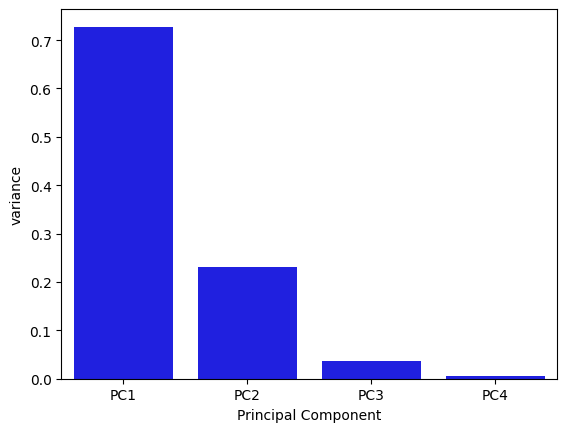

In [ ]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Component',y="variance",
           data=dataframe, color="b");

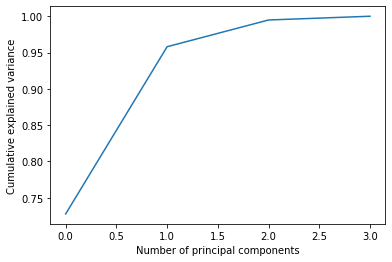

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)

In [ ]:
iris_df['Species'] = iris_df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

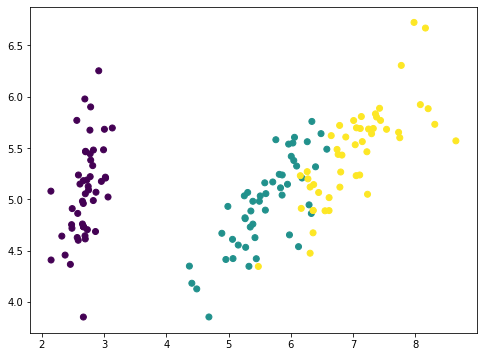

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(pca_2d[:,0], pca_2d[:,1],c=iris_df['Species'])
plt.show()

In [ ]:
pca_4 = PCA(n_components =4 )
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(X_variables)

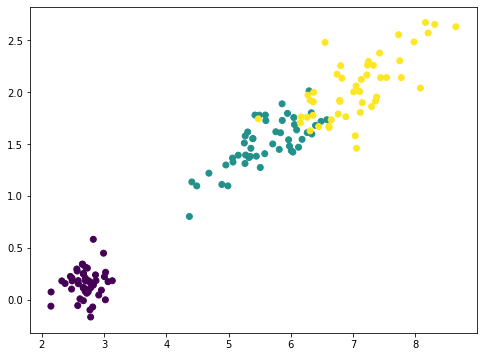

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(pca_4d[:,0], pca_4d[:,3],c=iris_df['Species'])
plt.show()

Overall, the goal is to see if the reduced-dimensional representation (using PCA) reveals patterns or separations between the different classes in the Iris dataset. It helps in visualizing how well the chosen components capture the variability in the data.